In [1]:
import numpy as np
import sys
import os, sys
import matplotlib.pyplot as plt
import xarray as xr
#from xarray import open_mfadataset
import cartopy.crs as crs
import cartopy
from matplotlib.colors import LogNorm
import numpy as np
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature
import cmocean
import matplotlib
#from pathlib import Path4
#edit 12/04
from pathlib import Path
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import pyplot as plt
import rasterio
from rasterio.plot import show
#try adding
#import cfunits
from pyschism.mesh import Hgrid
import pyschism
from matplotlib.image import imread
import cmcrameri.cm as ccm
from matplotlib.collections import PolyCollection

print("Modules imported!")


ERROR 1: PROJ: proj_create_from_database: Open of /global/home/users/jennaisrael/.conda/envs/geoplot/share/proj failed
/global/home/users/jennaisrael/.local/lib/python3.11/site-packages/pyschism/forcing/hycom/gofs.py:8: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater as sw
/global/home/users/jennaisrael/.conda/envs/geoplot/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Modules imported!


In [2]:
#import Sienna's plotting library
import schism_plot_lib_12_04 as spl
import time

In [3]:
#Plot the salinity difference for 08/23/2014
#what time step does that correspond to?
#146 days after 03/30

In [4]:
fn = "/global/scratch/users/jennaisrael/run_schism/run_26/outputs/"
run = spl.SchismOutput(output_folder=fn)


 Creating run object for results in /global/scratch/users/jennaisrael/run_schism/run_26/outputs/ ... 

Found 3331 netcdf files!
Found output for:
	 1 - horizontalVelX
	 2 - horizontalVelY
	 3 - hotstart
	 4 - out2d
	 5 - salinity
	 6 - temperature
	 7 - zCoordinates


In [5]:
ds = run.Result(run, variable = "salinity", filenumber=147)

/global/scratch/users/jennaisrael/run_schism/run_26/outputs/salinity_147.nc
Loading in /global/scratch/users/jennaisrael/run_schism/run_26/outputs/salinity_147.nc
Loaded in dataset! 

<xarray.Dataset> Size: 1GB
Dimensions:   (time: 48, nSCHISM_hgrid_node: 305834, nSCHISM_vgrid_layers: 23)
Coordinates:
  * time      (time) float64 384B 1.262e+07 1.262e+07 ... 1.27e+07 1.27e+07
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    salinity  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 1GB ...
TIME [12616200. 12618000. 12619800. 12621600. 12623400. 12625200. 12627000.
 12628800. 12630600. 12632400. 12634200. 12636000. 12637800. 12639600.
 12641400. 12643200. 12645000. 12646800. 12648600. 12650400. 12652200.
 12654000. 12655800. 12657600. 12659400. 12661200. 12663000. 12664800.
 12666600. 12668400. 12670200. 12672000. 12673800. 12675600. 12677400.
 12679200. 12681000. 12682800. 12684600. 12686400. 12688200. 12690000.
 12691800. 12693600. 1

In [6]:
#1.262e+07 seconds = 146 days

In [7]:
run.run_dir

PosixPath('/global/scratch/users/jennaisrael/run_schism/run_26')

In [8]:
run.run_dir / "hgrid.gr3"

PosixPath('/global/scratch/users/jennaisrael/run_schism/run_26/hgrid.gr3')

In [9]:
proj_utm10 = 'EPSG:26910'

In [10]:
hgrid = Hgrid.open('/global/scratch/users/jennaisrael/run_schism/run_26/hgrid_clean.gr3', crs=proj_utm10)

Taking temporal average ... 
[12616200. 12618000. 12619800. 12621600. 12623400. 12625200. 12627000.
 12628800. 12630600. 12632400. 12634200. 12636000. 12637800. 12639600.
 12641400. 12643200. 12645000. 12646800. 12648600. 12650400. 12652200.
 12654000. 12655800. 12657600. 12659400. 12661200. 12663000. 12664800.
 12666600. 12668400. 12670200. 12672000. 12673800. 12675600. 12677400.
 12679200. 12681000. 12682800. 12684600. 12686400. 12688200. 12690000.
 12691800. 12693600. 12695400. 12697200. 12699000. 12700800.]
Model is at time = time-averaged from Jan 01 1970 00:00 to Jan 01 1970 00:00
Taking depth average ... 
Loaded in hgrid.gr3 file...

Domain = Bay-Delta
Domain options: SSC, Delta, South_Delta, Bay_Delta
/global/scratch/users/jennaisrael/Plotting/AGU_24_plots


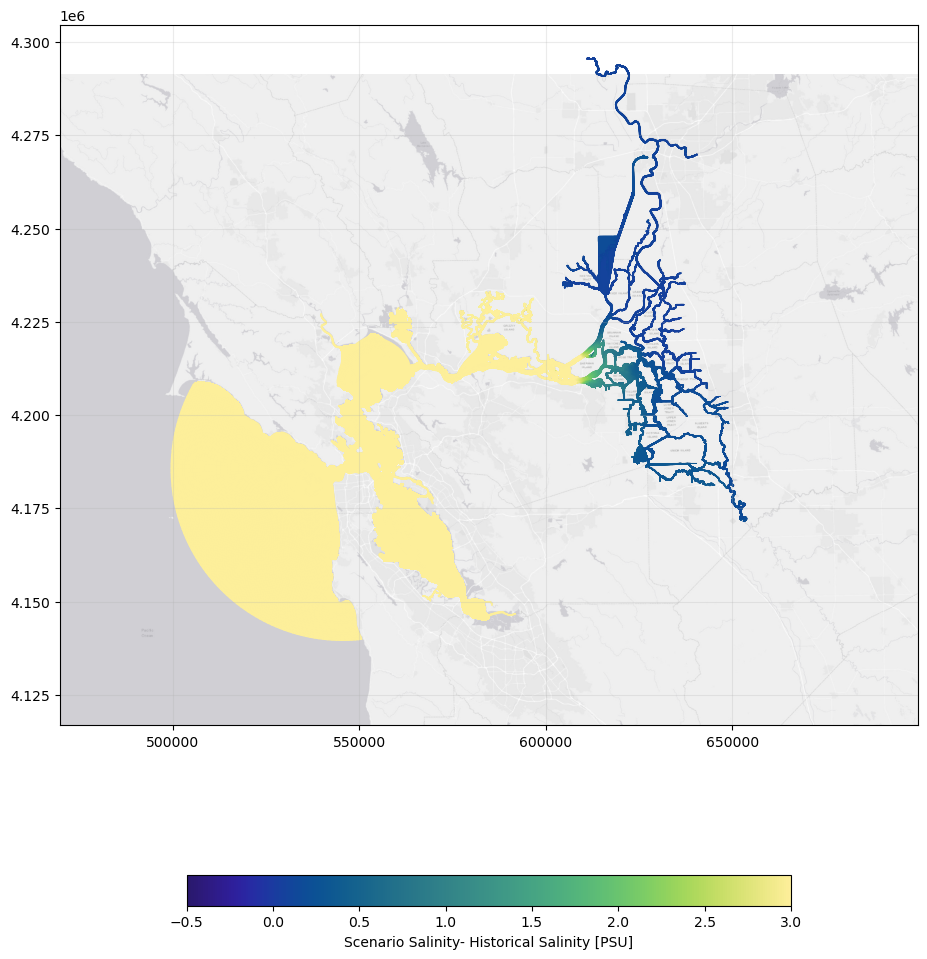

In [11]:
fig1, ax1 = ds.plot_variable(run, domain="Bay-Delta", time="average",depth= "average",titlestr="Historical Salinity 08/23/2014")

In [12]:
#subtract the historical from the SLR on the same day
fn2 = "/global/scratch/users/jennaisrael/run_schism/run_25/outputs/"
run2 = spl.SchismOutput(output_folder=fn2)
dslr1 = run2.Result(run2, variable = "salinity", filenumber=147)


 Creating run object for results in /global/scratch/users/jennaisrael/run_schism/run_25/outputs/ ... 

Found 2631 netcdf files!
Found output for:
	 1 - horizontalVelX
	 2 - horizontalVelY
	 3 - hotstart
	 4 - out2d
	 5 - salinity
	 6 - temperature
	 7 - zCoordinates
/global/scratch/users/jennaisrael/run_schism/run_25/outputs/salinity_147.nc
Loading in /global/scratch/users/jennaisrael/run_schism/run_25/outputs/salinity_147.nc
Loaded in dataset! 

<xarray.Dataset> Size: 1GB
Dimensions:   (time: 48, nSCHISM_hgrid_node: 305834, nSCHISM_vgrid_layers: 23)
Coordinates:
  * time      (time) float64 384B 1.262e+07 1.262e+07 ... 1.27e+07 1.27e+07
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    salinity  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 1GB ...
TIME [12616200. 12618000. 12619800. 12621600. 12623400. 12625200. 12627000.
 12628800. 12630600. 12632400. 12634200. 12636000. 12637800. 12639600.
 12641400. 12643200. 12645000. 1264680

In [13]:
dslr1.dataset

<xarray.Dataset> Size: 1GB
Dimensions:   (time: 48, nSCHISM_hgrid_node: 305834, nSCHISM_vgrid_layers: 23)
Coordinates:
  * time      (time) float64 384B 1.262e+07 1.262e+07 ... 1.27e+07 1.27e+07
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    salinity  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 1GB ...

In [14]:
sal1_diff=dslr1.dataset-ds.dataset


In [15]:
sal1_diff

<xarray.Dataset> Size: 1GB
Dimensions:   (time: 48, nSCHISM_hgrid_node: 305834, nSCHISM_vgrid_layers: 23)
Coordinates:
  * time      (time) float64 384B 1.262e+07 1.262e+07 ... 1.27e+07 1.27e+07
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    salinity  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 1GB na...

In [14]:
dslr1.dataset=sal1_diff


In [15]:
print(sal1_diff.max())
print(sal1_diff.min())

<xarray.Dataset> Size: 4B
Dimensions:   ()
Data variables:
    salinity  float32 4B 10.08
<xarray.Dataset> Size: 4B
Dimensions:   ()
Data variables:
    salinity  float32 4B -6.253


Taking temporal average ... 
[12616200. 12618000. 12619800. 12621600. 12623400. 12625200. 12627000.
 12628800. 12630600. 12632400. 12634200. 12636000. 12637800. 12639600.
 12641400. 12643200. 12645000. 12646800. 12648600. 12650400. 12652200.
 12654000. 12655800. 12657600. 12659400. 12661200. 12663000. 12664800.
 12666600. 12668400. 12670200. 12672000. 12673800. 12675600. 12677400.
 12679200. 12681000. 12682800. 12684600. 12686400. 12688200. 12690000.
 12691800. 12693600. 12695400. 12697200. 12699000. 12700800.]
Model is at time = time-averaged from Jan 01 1970 00:00 to Jan 01 1970 00:00
Taking depth average ... 
Domain = Delta
/global/scratch/users/jennaisrael/Plotting/AGU_24_plots


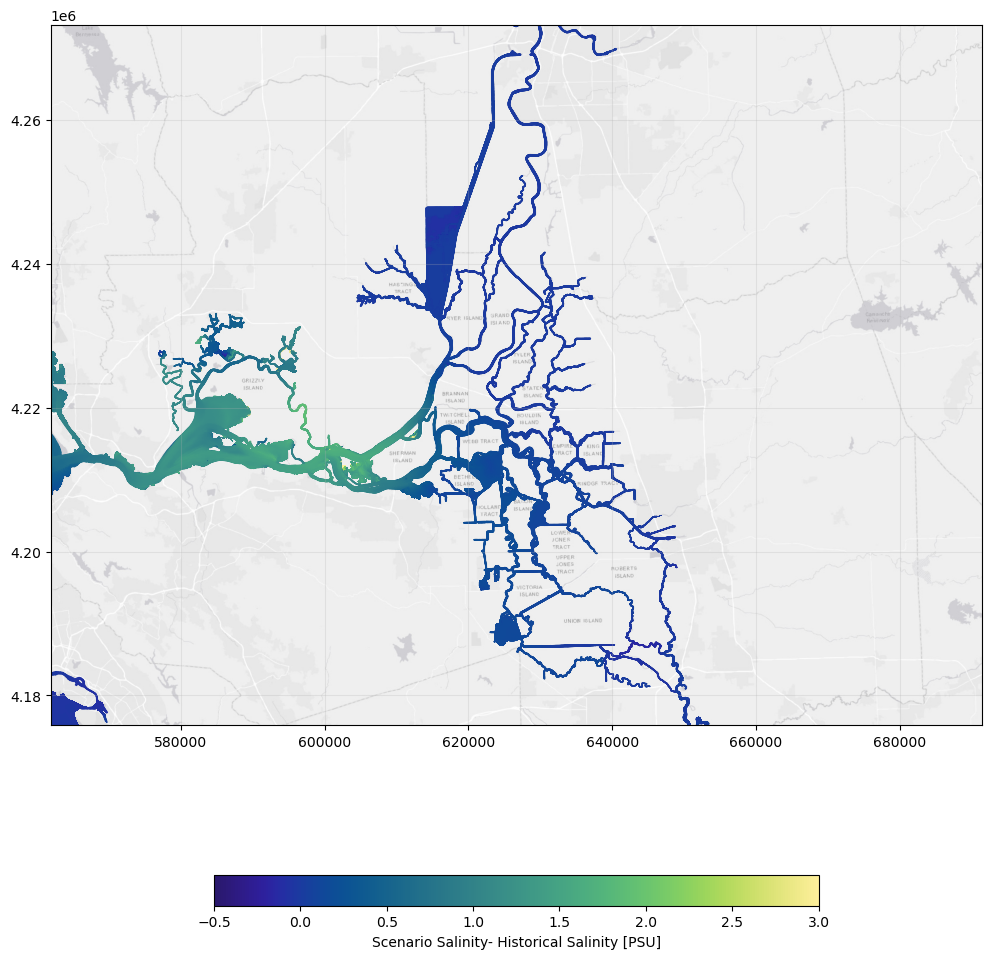

In [16]:
fig2, ax2 = dslr1.plot_variable(run, domain="Delta", time="average",depth= "average",titlestr="0.8 m RLSR - Histoical Salinity 08/23/2014")

In [17]:
# values[schism_output.hgrid.quads]

In [18]:
#ax2.climits[]

In [19]:
#subtract the historical from the SLR on the same day
fn3 = "/global/scratch/users/jennaisrael/run_schism/run_27/outputs/"
run3 = spl.SchismOutput(output_folder=fn3)
dslr2 = run3.Result(run3, variable = "salinity", filenumber=147)


 Creating run object for results in /global/scratch/users/jennaisrael/run_schism/run_27/outputs/ ... 

Found 2309 netcdf files!
Found output for:
	 1 - horizontalVelX
	 2 - horizontalVelY
	 3 - hotstart
	 4 - out2d
	 5 - salinity
	 6 - temperature
	 7 - zCoordinates
/global/scratch/users/jennaisrael/run_schism/run_27/outputs/salinity_147.nc
Loading in /global/scratch/users/jennaisrael/run_schism/run_27/outputs/salinity_147.nc
Loaded in dataset! 

<xarray.Dataset> Size: 1GB
Dimensions:   (time: 48, nSCHISM_hgrid_node: 305834, nSCHISM_vgrid_layers: 23)
Coordinates:
  * time      (time) float64 384B 1.262e+07 1.262e+07 ... 1.27e+07 1.27e+07
Dimensions without coordinates: nSCHISM_hgrid_node, nSCHISM_vgrid_layers
Data variables:
    salinity  (time, nSCHISM_hgrid_node, nSCHISM_vgrid_layers) float32 1GB ...
TIME [12616200. 12618000. 12619800. 12621600. 12623400. 12625200. 12627000.
 12628800. 12630600. 12632400. 12634200. 12636000. 12637800. 12639600.
 12641400. 12643200. 12645000. 1264680

In [20]:
sal2_diff=dslr2.dataset-ds.dataset
dslr2.dataset=sal2_diff

In [21]:
print(sal2_diff.max())
print(sal2_diff.min())

<xarray.Dataset> Size: 4B
Dimensions:   ()
Data variables:
    salinity  float32 4B 10.7
<xarray.Dataset> Size: 4B
Dimensions:   ()
Data variables:
    salinity  float32 4B -5.869


Taking temporal average ... 
[12616200. 12618000. 12619800. 12621600. 12623400. 12625200. 12627000.
 12628800. 12630600. 12632400. 12634200. 12636000. 12637800. 12639600.
 12641400. 12643200. 12645000. 12646800. 12648600. 12650400. 12652200.
 12654000. 12655800. 12657600. 12659400. 12661200. 12663000. 12664800.
 12666600. 12668400. 12670200. 12672000. 12673800. 12675600. 12677400.
 12679200. 12681000. 12682800. 12684600. 12686400. 12688200. 12690000.
 12691800. 12693600. 12695400. 12697200. 12699000. 12700800.]
Model is at time = time-averaged from Jan 01 1970 00:00 to Jan 01 1970 00:00
Taking depth average ... 
Domain = Delta
/global/scratch/users/jennaisrael/Plotting/AGU_24_plots


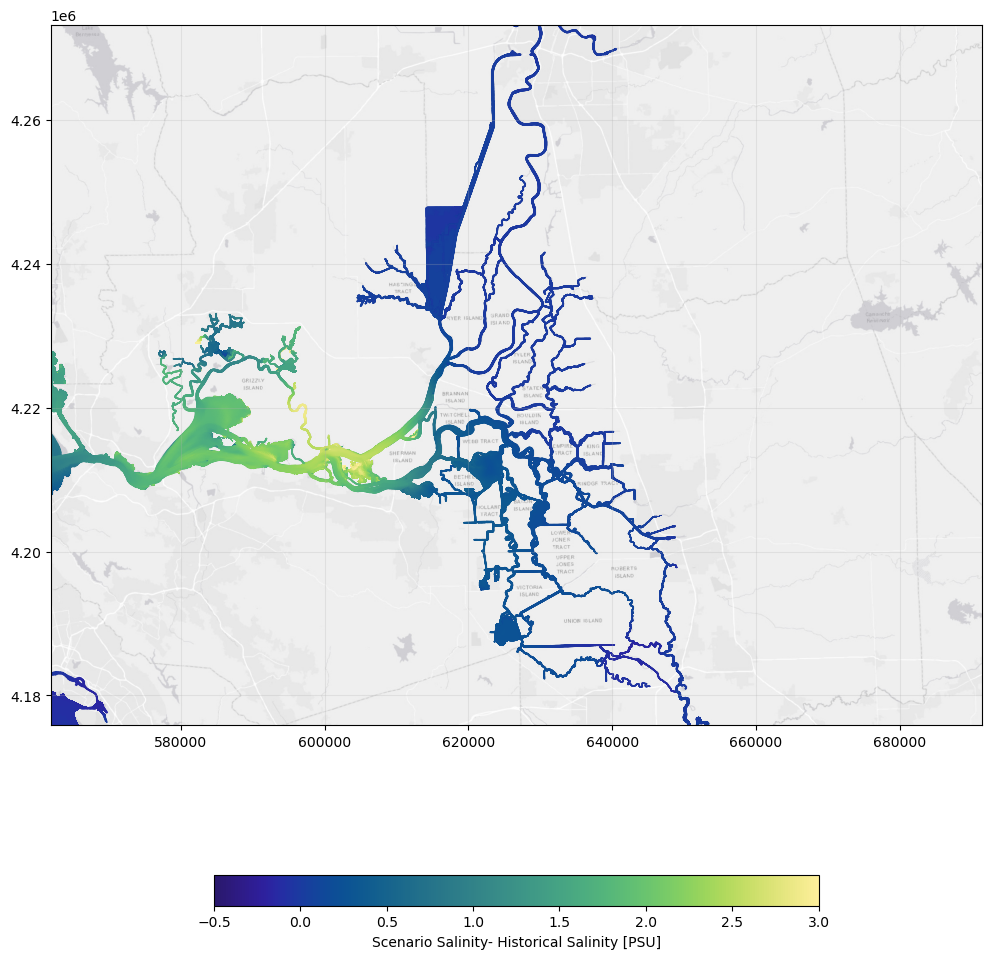

In [22]:
fig3, ax3 = dslr2.plot_variable(run, domain="Delta", time="average",depth= "average",titlestr="1.2 m RLSR - Histoical Salinity 08/23/2014")

In [23]:
#export figures 2 and 3
fig2.savefig('salinity_SLR1.png')
fig3.savefig('salinity_SLR2.png')